<a href="https://colab.research.google.com/github/UmeshGayashan/EC7212-Take-Home-Assignment-1/blob/main/Task4_TakeHomeAssingment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

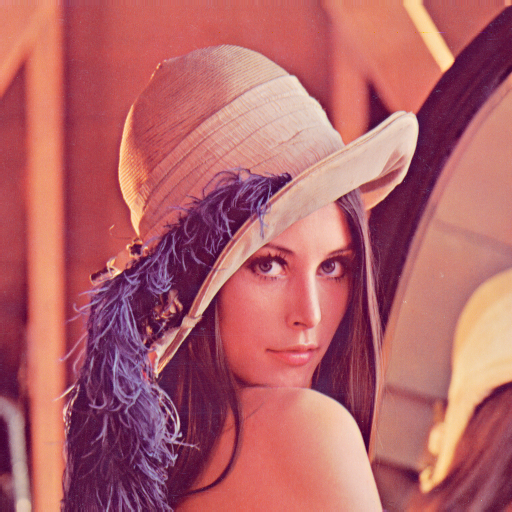

In [1]:
!pip install -qU gdown
!pip install easyocr

# Mount Google Drive directly
from google.colab import drive
drive.mount('/content/gdrive')

# Imports for displaying the image
import os
from PIL import Image
import IPython.display as display

image_path = '/content/gdrive/MyDrive/Take_Home_Assignment_1'

if os.path.exists(image_path):
    # Choose Images from directry
    image_files = [f for f in os.listdir(image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    if image_files:
        img_path = os.path.join(image_path, image_files[0])
        img = Image.open(img_path)
        display.display(img)
    else:
        print("No images found in the folder.")
else:
    print("Error: Folder not found. Check sharing permissions and folder name.")

<h2>Block-wise Averaging for Spatial Resolution Reduction

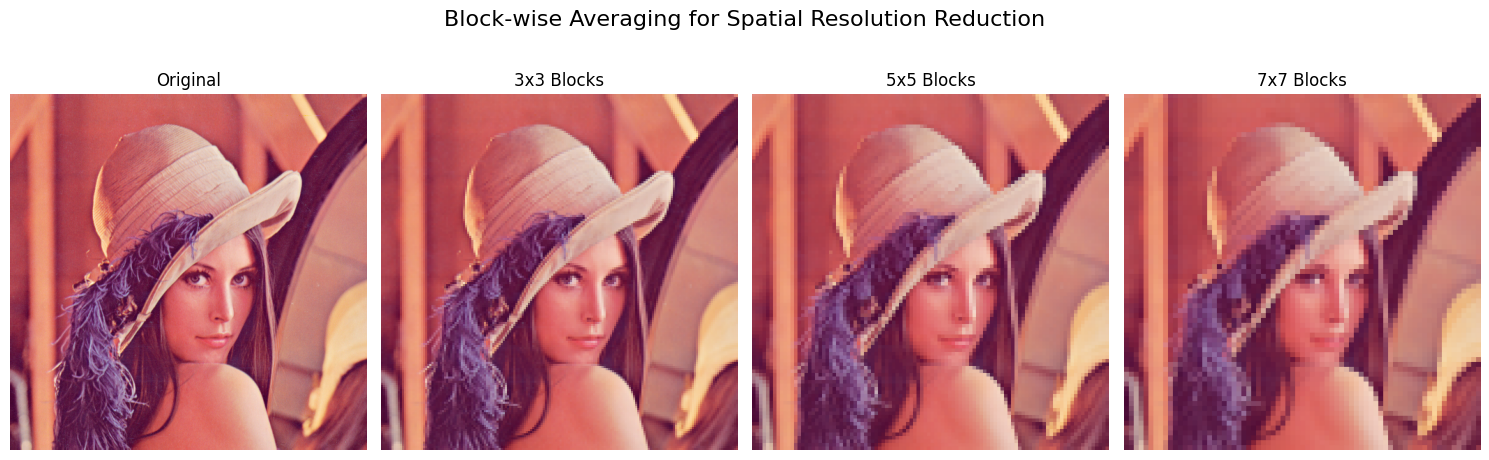

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def block_average_downsample(image_path, block_sizes=[3, 5, 7]):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    def downsample_by_block(image, block_size):

        h, w, c = image.shape

        # Crop the image to ensure divisible by block size
        h_crop = (h // block_size) * block_size
        w_crop = (w // block_size) * block_size
        image_cropped = image[:h_crop, :w_crop]

        # Reshape and average blocks
        # (rows_of_blocks, block_height, cols_of_blocks, block_width, channels)
        output = image_cropped.reshape(
            h_crop // block_size, block_size,
            w_crop // block_size, block_size, c
        ).mean(axis=(1, 3)).astype(np.uint8) # Averages are usually floats -> int

        # Resize back to original cropped size for display
        return cv2.resize(output, (w_crop, h_crop), interpolation=cv2.INTER_NEAREST)

    total_images = 1 + len(block_sizes)
    fig, axes = plt.subplots(1, total_images, figsize=(15, 5))
    fig.suptitle("Block-wise Averaging for Spatial Resolution Reduction", fontsize=16)

    # Show original
    axes[0].imshow(img)
    axes[0].set_title("Original")
    axes[0].axis('off')

    # Apply block-averaging for given size
    for i, k in enumerate(block_sizes):
        reduced = downsample_by_block(img, k)
        ax = axes[i + 1]
        ax.imshow(reduced)
        ax.set_title(f"{k}x{k} Blocks")
        ax.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

block_average_downsample(img_path)